In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from googletrans import Translator
from sklearn.linear_model import LogisticRegression

In [47]:
data = pd.read_csv('israel data.csv', low_memory = False) 

In [48]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-24,0,0,0,0,0,שלילי,NaN,נקבה,Other
1,2021-10-24,0,0,0,0,0,שלילי,NaN,NaN,Other
2,2021-10-24,0,0,0,0,0,שלילי,NaN,נקבה,Other
3,2021-10-24,0,0,0,0,0,שלילי,NaN,NaN,Other
4,2021-10-24,0,0,0,0,0,שלילי,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...
7651048,2020-03-11,0,0,0,0,1,שלילי,NaN,נקבה,Abroad
7651049,2020-03-11,1,1,1,0,0,שלילי,NaN,נקבה,Abroad
7651050,2020-03-11,0,1,0,1,0,שלילי,NaN,זכר,Other
7651051,2020-03-11,0,0,0,0,0,שלילי,NaN,זכר,Other


In [49]:
data.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,7.651053e+06,7.651053e+06,7.651053e+06,7.651053e+06,7.651053e+06
mean,4.213211e-02,3.497911e-02,1.650113e-02,4.092116e-03,3.399205e-02
std,2.008905e-01,1.837269e-01,1.273925e-01,6.383864e-02,1.812087e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [50]:
data.dtypes

test_date              object
cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [51]:
translator = Translator()

In [52]:
data['corona_result'].unique()

array(['שלילי', 'אחר', 'חיובי'], dtype=object)

In [53]:
data['gender'].unique()

array(['נקבה', nan, 'זכר'], dtype=object)

In [54]:
data.corona_result = data.corona_result.replace('חיובי','positive')
data.corona_result = data.corona_result.replace('שלילי','negative')
data.corona_result = data.corona_result.replace('אחר','other')
data.gender = data.gender.replace('נקבה','female')
data.gender = data.gender.replace('זכר','male')

In [55]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-24,0,0,0,0,0,negative,NaN,female,Other
1,2021-10-24,0,0,0,0,0,negative,NaN,NaN,Other
2,2021-10-24,0,0,0,0,0,negative,NaN,female,Other
3,2021-10-24,0,0,0,0,0,negative,NaN,NaN,Other
4,2021-10-24,0,0,0,0,0,negative,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...
7651048,2020-03-11,0,0,0,0,1,negative,NaN,female,Abroad
7651049,2020-03-11,1,1,1,0,0,negative,NaN,female,Abroad
7651050,2020-03-11,0,1,0,1,0,negative,NaN,male,Other
7651051,2020-03-11,0,0,0,0,0,negative,NaN,male,Other


In [56]:
data['test_indication'].unique()

array(['Other', 'Contact with confirmed', 'Abroad'], dtype=object)

In [57]:
data.dropna(inplace=True)

In [58]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
113976,2021-10-11,0,0,0,0,0,negative,Yes,female,Other
113977,2021-10-11,0,0,0,0,0,negative,No,male,Other
113978,2021-10-11,0,0,0,0,0,negative,No,female,Other
113979,2021-10-11,0,0,0,0,0,negative,No,female,Other
113980,2021-10-11,0,0,0,0,0,negative,No,male,Other
...,...,...,...,...,...,...,...,...,...,...
7640100,2020-03-20,0,0,0,0,0,negative,No,male,Other
7640101,2020-03-20,0,0,0,0,0,negative,No,male,Other
7640102,2020-03-20,0,0,0,0,0,negative,No,female,Other
7640103,2020-03-20,0,0,0,0,0,negative,No,female,Other


In [59]:
data['test_date'] = pd.to_datetime(data.test_date)

In [60]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [61]:
data['corona_result'].unique()
data = data.loc[data["corona_result"] != 'other']

In [62]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
113976,2021-10-11,0,0,0,0,0,negative,Yes,female,Other
113977,2021-10-11,0,0,0,0,0,negative,No,male,Other
113978,2021-10-11,0,0,0,0,0,negative,No,female,Other
113979,2021-10-11,0,0,0,0,0,negative,No,female,Other
113980,2021-10-11,0,0,0,0,0,negative,No,male,Other
...,...,...,...,...,...,...,...,...,...,...
7640100,2020-03-20,0,0,0,0,0,negative,No,male,Other
7640101,2020-03-20,0,0,0,0,0,negative,No,male,Other
7640102,2020-03-20,0,0,0,0,0,negative,No,female,Other
7640103,2020-03-20,0,0,0,0,0,negative,No,female,Other


In [63]:
data[data['test_indication'] == 'Contact with confirmed']['corona_result'].value_counts(normalize=True)

negative    0.560874
positive    0.439126
Name: corona_result, dtype: float64

In [64]:
data[data['test_indication'] != 'Contact with confirmed']['corona_result'].value_counts(normalize=True)

negative    0.94564
positive    0.05436
Name: corona_result, dtype: float64

In [65]:
data[data['age_60_and_above'] == 'Yes']['corona_result'].value_counts(normalize=True)

negative    0.919421
positive    0.080579
Name: corona_result, dtype: float64

In [66]:
data[data['age_60_and_above'] != 'Yes']['corona_result'].value_counts(normalize=True)

negative    0.913218
positive    0.086782
Name: corona_result, dtype: float64

In [67]:
data[data['cough'] == 1]['corona_result'].value_counts(normalize=True)

negative    0.620971
positive    0.379029
Name: corona_result, dtype: float64

In [68]:
data[data['cough'] == 0]['corona_result'].value_counts(normalize=True)

negative    0.928323
positive    0.071677
Name: corona_result, dtype: float64

In [69]:
data[data['fever'] == 1]['corona_result'].value_counts(normalize=True)

negative    0.58159
positive    0.41841
Name: corona_result, dtype: float64

In [70]:
data[data['fever'] == 0]['corona_result'].value_counts(normalize=True)

negative    0.927446
positive    0.072554
Name: corona_result, dtype: float64

In [71]:
data[data['head_ache'] == 1]['corona_result'].value_counts(normalize=True)

negative    0.565209
positive    0.434791
Name: corona_result, dtype: float64

In [72]:
data[data['head_ache'] == 0]['corona_result'].value_counts(normalize=True)

negative    0.928158
positive    0.071842
Name: corona_result, dtype: float64

In [73]:
data[data['sore_throat'] == 1]['corona_result'].value_counts(normalize=True)

negative    0.569536
positive    0.430464
Name: corona_result, dtype: float64

In [74]:
data[data['sore_throat'] == 0]['corona_result'].value_counts(normalize=True)

negative    0.920605
positive    0.079395
Name: corona_result, dtype: float64

In [75]:
data[data['shortness_of_breath'] == 1]['corona_result'].value_counts(normalize=True)

positive    0.511972
negative    0.488028
Name: corona_result, dtype: float64

In [76]:
data[data['shortness_of_breath'] == 0]['corona_result'].value_counts(normalize=True)

negative    0.915935
positive    0.084065
Name: corona_result, dtype: float64

In [77]:
data[data['gender'] == 'male']['corona_result'].value_counts(normalize=True)

negative    0.91143
positive    0.08857
Name: corona_result, dtype: float64

In [78]:
data[data['gender'] == 'female']['corona_result'].value_counts(normalize=True)

negative    0.916284
positive    0.083716
Name: corona_result, dtype: float64

In [79]:
data[data['test_indication'] == 'Abroad']['corona_result'].value_counts(normalize=True)

negative    0.888465
positive    0.111535
Name: corona_result, dtype: float64

In [80]:
data[data['test_indication'] != 'Abroad']['corona_result'].value_counts(normalize=True)

negative    0.914066
positive    0.085934
Name: corona_result, dtype: float64

In [82]:
one_hot = pd.get_dummies(data)
one_hot = one_hot.drop(['corona_result_negative', 'age_60_and_above_No', 'gender_female'], axis = 1)

In [84]:
grouped = one_hot.groupby(['test_date'])['corona_result_positive'].agg('sum')

<AxesSubplot:xlabel='test_date', ylabel='corona_result_positive'>

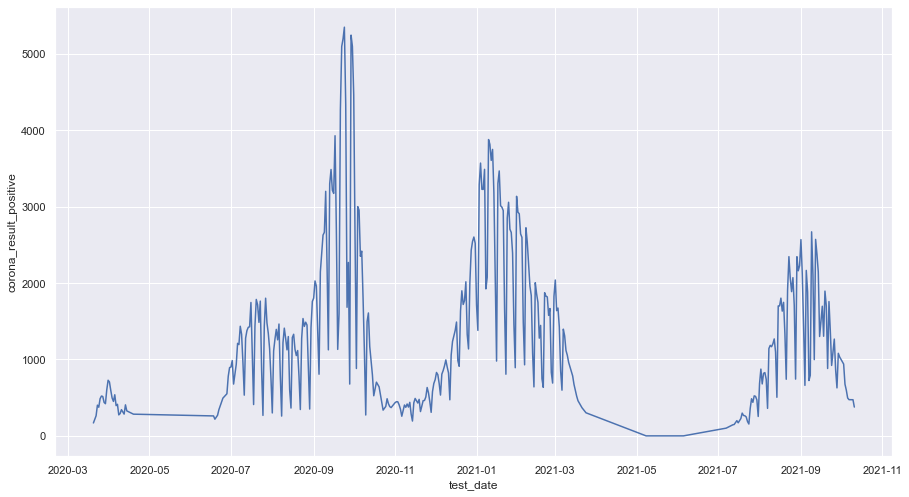

In [85]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.lineplot(data = grouped)

In [86]:
one_hot.sort_values('corona_result_positive', inplace=True, ascending=False)
one_hot['corona_result_positive'].value_counts()

0    5338773
1     502403
Name: corona_result_positive, dtype: int64

In [87]:
dataset = one_hot.iloc[0:1004806]

In [88]:
dataset['corona_result_positive'].value_counts()

1    502403
0    502403
Name: corona_result_positive, dtype: int64

In [89]:
dataset = dataset.sample(frac=1)

In [90]:
dataset

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result_positive,age_60_and_above_Yes,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other
5327265,2020-10-09,0,0,0,0,0,1,0,0,0,1,0
4411880,2020-12-09,0,0,0,0,0,0,0,0,0,0,1
5407849,2020-10-05,0,0,0,0,0,0,0,0,0,0,1
5344135,2020-10-08,0,0,0,0,0,0,1,1,0,0,1
5221884,2020-10-18,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5163925,2020-10-22,0,0,0,0,0,0,0,0,0,0,1
440627,2021-09-17,1,0,0,0,0,1,0,1,0,1,0
3165522,2021-01-25,0,0,0,0,0,1,0,0,0,1,0
4417605,2020-12-09,0,0,0,0,0,0,1,1,0,0,1


In [91]:
train, test = train_test_split(dataset, test_size=0.005)

In [141]:
yTr = train['corona_result_positive']
yTe = test['corona_result_positive']
xTr = train[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'test_indication_Abroad', 'test_indication_Contact with confirmed']]
xTe = test[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'test_indication_Abroad', 'test_indication_Contact with confirmed']]

In [142]:
model = LogisticRegression(random_state=0).fit(xTr, yTr)

In [143]:
model.predict(xTe)

array([1, 1, 0, ..., 1, 1, 0], dtype=uint8)

In [144]:
probs = model.predict_proba(xTe)
probs = probs[:,0]
probs

array([0.21782008, 0.21782008, 0.68083098, ..., 0.08254791, 0.08254791,
       0.68083098])

In [145]:
model.score(xTe, yTe)

0.7594029850746269

In [173]:
ts = np.arange(0.001, 0.5, 0.001).tolist()
ts.reverse()

<AxesSubplot:>

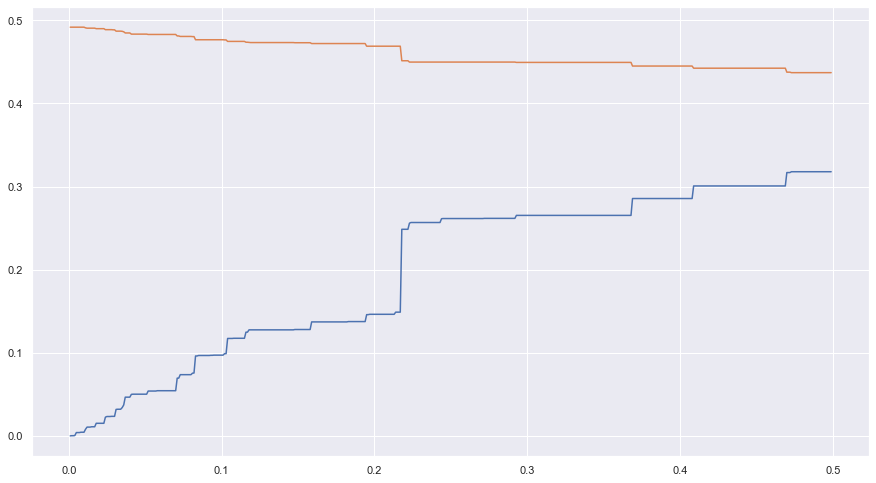

In [177]:
fps = np.zeros(len(ts))
fns = np.zeros(len(ts))
for i in range(len(ts)):
    preds = probs > ts[i]
    FP = np.logical_and(yTe != preds, preds == 1).sum()  
    FN = np.logical_and(yTe != preds, preds == 0).sum()

    FPR = FP/preds.shape[0]
    FNR = FN/preds.shape[0]
    
    fps[i] = FPR
    fns[i] = FNR
    

sns.lineplot(x = ts, y = fns)
sns.lineplot(x = ts, y = fps)

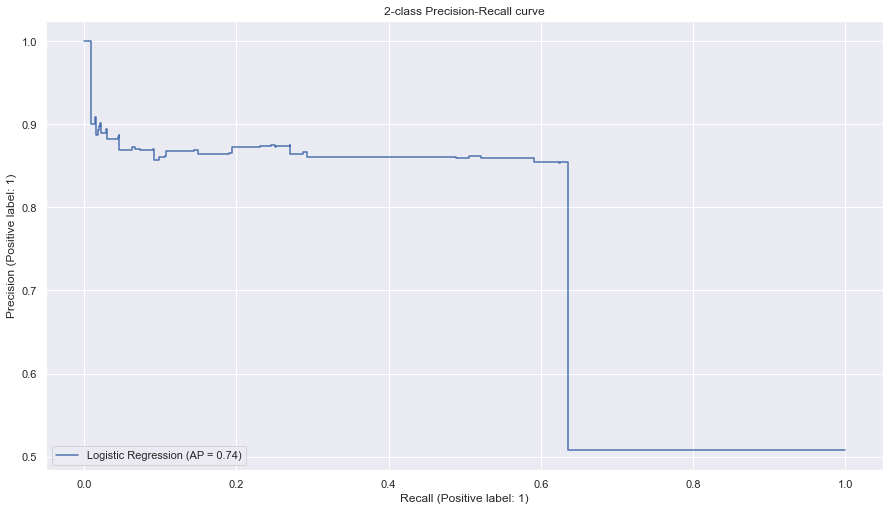

In [146]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(yTe, probs)
# sns.lineplot(x = recall, y = precision)
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    model, xTe, yTe, name="Logistic Regression"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(xTr, yTr)

KNeighborsClassifier(n_neighbors=3)

In [99]:
knn_model.predict(xTe)

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [100]:
knn_model.score(xTe, yTe)

0.6405970149253731

In [101]:
scores = np.zeros(19)
for k in range(1, 20, 1):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(xTr, yTr)
    scores[k - 1] = knn_model.score(xTe, yTe)

<AxesSubplot:>

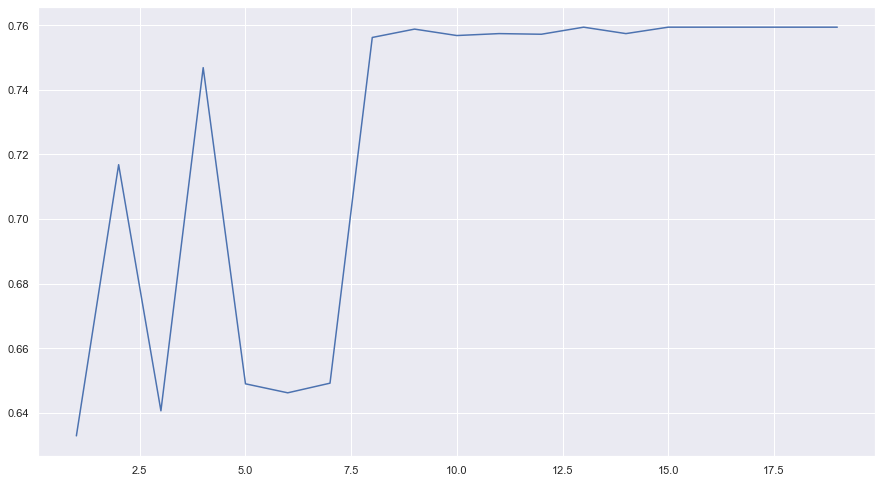

In [102]:
sns.lineplot(x = np.array(range(1, 20, 1)), y = scores)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(min_samples_leaf = 8000)
tree.fit(xTr, yTr)

In [ ]:
tree.score(xTe, yTe)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

def draw_tree(tree):
    dot_data = export_graphviz(tree, out_file=None, 
                               feature_names=['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'gender_male', 'test_indication_Abroad', 'test_indication_Contact with confirmed'], 
                               class_names=['positive', 'negative'],
                               filled=True, 
                               #impurity=True,
                               rounded=True,  
                               special_characters=True,
                               proportion = True)  #trying changing proportion = False
    
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render('tree',view=True)

In [ ]:
draw_tree(tree)